In [1]:
import cv2
import os
import numpy as np
from PIL import Image

In [3]:
features=[]
target=[]
for x in ['NoWrinkles', 'Wrinkles']:
    ImagesNamesList=os.listdir(r"C:\Users\LENOVO\OneDrive\Desktop\ML\archive\face_age\101" + "/" + str(x) )
    for y in ImagesNamesList:
        Imgarr=cv2.imread(r"C:\Users\LENOVO\OneDrive\Desktop\ML\archive\face_age\101" + "/" + str(x) + "/" + y)
        try:
            Imgarr=cv2.resize(Imgarr,(50,50))
            features.append(Imgarr)
        except:
            pass
        else:
            if x=="NoWrinkles":
                target.append(0)
            else:
                target.append(1)
        
    
    print("In Folder", x)
        
            

FileNotFoundError: ignored

In [ ]:
features=np.array(features)
features

array([[[[  9,   9,  19],
         [ 16,  17,  34],
         [ 25,  30,  54],
         ...,
         [209, 209, 209],
         [209, 209, 209],
         [209, 209, 209]],

        [[ 15,  15,  28],
         [ 27,  30,  49],
         [ 37,  45,  75],
         ...,
         [212, 212, 212],
         [212, 212, 212],
         [212, 212, 212]],

        [[ 15,  15,  31],
         [ 25,  28,  54],
         [ 35,  45,  84],
         ...,
         [211, 211, 211],
         [212, 212, 212],
         [210, 210, 210]],

        ...,

        [[ 86, 111, 175],
         [ 88, 112, 177],
         [ 92, 115, 183],
         ...,
         [230, 230, 230],
         [230, 230, 230],
         [230, 230, 230]],

        [[ 57,  68, 128],
         [ 51,  66, 132],
         [ 44,  61, 140],
         ...,
         [232, 230, 230],
         [228, 228, 228],
         [228, 228, 228]],

        [[ 13,  20,  65],
         [  9,  16,  80],
         [ 10,  13, 103],
         ...,
         [229, 227, 227],
        

In [ ]:
target=np.array(target)

In [ ]:
features

array([[[[  9,   9,  19],
         [ 16,  17,  34],
         [ 25,  30,  54],
         ...,
         [209, 209, 209],
         [209, 209, 209],
         [209, 209, 209]],

        [[ 15,  15,  28],
         [ 27,  30,  49],
         [ 37,  45,  75],
         ...,
         [212, 212, 212],
         [212, 212, 212],
         [212, 212, 212]],

        [[ 15,  15,  31],
         [ 25,  28,  54],
         [ 35,  45,  84],
         ...,
         [211, 211, 211],
         [212, 212, 212],
         [210, 210, 210]],

        ...,

        [[ 86, 111, 175],
         [ 88, 112, 177],
         [ 92, 115, 183],
         ...,
         [230, 230, 230],
         [230, 230, 230],
         [230, 230, 230]],

        [[ 57,  68, 128],
         [ 51,  66, 132],
         [ 44,  61, 140],
         ...,
         [232, 230, 230],
         [228, 228, 228],
         [228, 228, 228]],

        [[ 13,  20,  65],
         [  9,  16,  80],
         [ 10,  13, 103],
         ...,
         [229, 227, 227],
        

In [ ]:
features.shape

(607, 50, 50, 3)

In [ ]:
target.shape

(607,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2)

In [ ]:
features_train.shape

(485, 50, 50, 3)

In [ ]:
target_train.shape

(485,)

In [ ]:
features_test.shape

(122, 50, 50, 3)

In [ ]:
target_test.shape

(122,)

In [ ]:
def preprocessing(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=image/255

    
    
    return image

In [ ]:
features_train=np.array(list(map(preprocessing,features_train)))

In [ ]:
features_train=features_train.reshape(485,50,50,1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)

In [ ]:
dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)

In [ ]:
batches=dataGen.flow(features_train,target_train,batch_size=20)

In [ ]:
images,labels=next(batches)

In [ ]:
import matplotlib.pyplot as plt

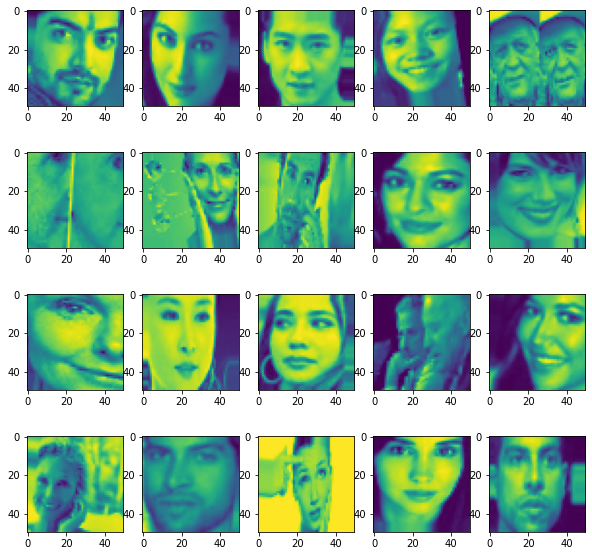

In [ ]:
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.imshow(images[i].reshape(50,50))
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
target_train=to_categorical(target_train)

In [ ]:
target_train.shape

(485, 2)

In [ ]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(Conv2D(100,(3,3),activation="relu",input_shape=(50,50,1)))
model.add(Conv2D(200,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(100,(3,3),activation="relu"))
model.add(Conv2D(100,(3,3),activation="relu"))
model.add(Conv2D(100,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))

In [ ]:
from keras.optimizers import Adam

In [ ]:
model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

C:\Users\Varun\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [ ]:
model.fit_generator(dataGen.flow(features_train,target_train,batch_size=20),epochs=20)

C:\Users\Varun\anaconda3\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
25/25 [==============================] - 23s 400ms/step - loss: 0.7025 - accuracy: 0.4724
Epoch 2/20
25/25 [==============================] - 11s 428ms/step - loss: 0.5988 - accuracy: 0.7439
Epoch 3/20
25/25 [==============================] - 11s 440ms/step - loss: 0.4046 - accuracy: 0.8114
Epoch 4/20
25/25 [==============================] - 11s 435ms/step - loss: 0.3970 - accuracy: 0.8314
Epoch 5/20
25/25 [==============================] - 11s 423ms/step - loss: 0.3443 - accuracy: 0.8335
Epoch 6/20
25/25 [==============================] - 11s 425ms/step - loss: 0.3317 - accuracy: 0.8814
Epoch 7/20
25/25 [==============================] - 11s 441ms/step - loss: 0.3825 - accuracy: 0.8351
Epoch 8/20
25/25 [==============================] - 12s 463ms/step - loss: 0.3222 - accuracy: 0.8788
Epoch 9/20
25/25 [==============================] - 11s 435ms/step - loss: 0.3340 - accuracy: 0.8470
Epoch 10/20
25/25 [==============================] - 11s 435ms/step - loss: 0.2552 - accura

In [ ]:
original_image = cv2.imread(r"D:\sample\Image Dataset\puffy eyes\49.jpg")

In [ ]:
from keras.models import model_from_json

In [ ]:
model_json=model.to_json()
with open(r"train.json","w") as abc:
    abc.write(model_json)
    abc.close
model.save_weights("train.h5")

In [ ]:

json_file=open(r"train.json","r")
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("train.h5")
print("yes")

yes


In [ ]:
image=original_image
imagearr=np.asarray(image)
face_cascade=cv2.CascadeClassifier(r"C:\Users\LOGESH\anaconda3\Library\etc\haarcascades\haarcascade_frontalface_default.xml")
faces=face_cascade.detectMultiScale(image,1.05,3)
for (column, row, width, height) in faces:
                cv2.rectangle(
                original_image,
                (column, row),
                (column + width, row + height),
                (255,0, 0),
                2)
for x,y,w,h in faces : 
    cropped_img = original_image [y:y+h,x:x+w]
    edges = cv2.Canny(cropped_img,30,100)        
    number_of_edges = np.count_nonzero(edges)
    if number_of_edges > 4000:
        cv2.rectangle(original_image,(x, y), (x+w,y+h), (0,0,225), 3)
        cv2.imwrite(r"C:\Users\Logesh\OneDrive\Desktop\New folder.jpg",image) 

    else:
        cv2.imwrite(r"C:\Users\Logesh\OneDrive\Desktop\New folder.jpg",image) 
        break
if number_of_edges <4000:
    print(" no Wrinkle Found ")
else:
    print("Wrinkles found")
print(number_of_edges)
        

 no Wrinkle Found 
2986


In [ ]:
features1=[]
target1=[]
for x in ['no puffy eyes', 'puffy eyes']:
    ImagesNamesList=os.listdir(r"‪D:\train2" + "/" + str(x) )
    for y in ImagesNamesList:
        Imgarr=cv2.imread(r"‪D:\train2" + "/" + str(x) + "/" + y)
        try:
            Imgarr=cv2.resize(Imgarr,(50,50))
            features1.append(Imgarr)
        except:
            pass
        else:
            if x=="no puffy eyes":
                target1.append(0)
            else:
                target1.append(1)
        
        
        
            
    print("In Folder", x)


In Folder no puffy eyes
In Folder puffy eyes


In [ ]:
features1=np.array(features1)
features1

array([[[[  9,   9,  19],
         [ 16,  17,  34],
         [ 25,  30,  54],
         ...,
         [209, 209, 209],
         [209, 209, 209],
         [209, 209, 209]],

        [[ 15,  15,  28],
         [ 27,  30,  49],
         [ 37,  45,  75],
         ...,
         [212, 212, 212],
         [212, 212, 212],
         [212, 212, 212]],

        [[ 15,  15,  31],
         [ 25,  28,  54],
         [ 35,  45,  84],
         ...,
         [211, 211, 211],
         [212, 212, 212],
         [210, 210, 210]],

        ...,

        [[ 86, 111, 175],
         [ 88, 112, 177],
         [ 92, 115, 183],
         ...,
         [230, 230, 230],
         [230, 230, 230],
         [230, 230, 230]],

        [[ 57,  68, 128],
         [ 51,  66, 132],
         [ 44,  61, 140],
         ...,
         [232, 230, 230],
         [228, 228, 228],
         [228, 228, 228]],

        [[ 13,  20,  65],
         [  9,  16,  80],
         [ 10,  13, 103],
         ...,
         [229, 227, 227],
        

In [ ]:
target1=np.array(target1)

In [ ]:

features1


array([[[[  9,   9,  19],
         [ 16,  17,  34],
         [ 25,  30,  54],
         ...,
         [209, 209, 209],
         [209, 209, 209],
         [209, 209, 209]],

        [[ 15,  15,  28],
         [ 27,  30,  49],
         [ 37,  45,  75],
         ...,
         [212, 212, 212],
         [212, 212, 212],
         [212, 212, 212]],

        [[ 15,  15,  31],
         [ 25,  28,  54],
         [ 35,  45,  84],
         ...,
         [211, 211, 211],
         [212, 212, 212],
         [210, 210, 210]],

        ...,

        [[ 86, 111, 175],
         [ 88, 112, 177],
         [ 92, 115, 183],
         ...,
         [230, 230, 230],
         [230, 230, 230],
         [230, 230, 230]],

        [[ 57,  68, 128],
         [ 51,  66, 132],
         [ 44,  61, 140],
         ...,
         [232, 230, 230],
         [228, 228, 228],
         [228, 228, 228]],

        [[ 13,  20,  65],
         [  9,  16,  80],
         [ 10,  13, 103],
         ...,
         [229, 227, 227],
        

In [ ]:
target1=np.array(target1)

In [ ]:
target1.shape


(607,)

In [ ]:
from sklearn.model_selection import train_test_split

features_train1,features_test1,target_train1,target_test1=train_test_split(features1,target1,test_size=0.2)

In [ ]:
features_train1.shape

(485, 50, 50, 3)

In [ ]:
target_train1.shape

(485,)

In [ ]:
features_test1.shape

(122, 50, 50, 3)

In [ ]:
target_test1.shape


(122,)

In [ ]:
def preprocessing(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=image/255

    
    
    return image

In [ ]:
features_train1=np.array(list(map(preprocessing,features_train1)))

In [ ]:
features_train1=features_train1.reshape(485,50,50,1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)


In [ ]:
dataGen.fit(features_train1)

In [ ]:
batches=dataGen.flow(features_train1,target_train1,batch_size=20)


In [ ]:
images,labels=next(batches)

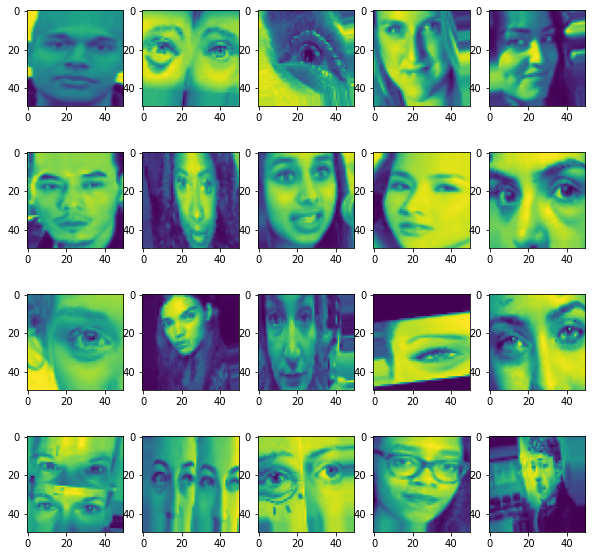

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.imshow(images[i].reshape(50,50))
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
target_train1=to_categorical(target_train1)
target_train1.shape

(485, 2)

In [ ]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential


In [ ]:
model=Sequential()
model.add(Conv2D(100,(3,3),activation="relu",input_shape=(50,50,1)))
model.add(Conv2D(200,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(100,(3,3),activation="relu"))
model.add(Conv2D(100,(3,3),activation="relu"))
model.add(Conv2D(100,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))

In [ ]:
from keras.optimizers import Adam

In [ ]:
model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(dataGen.flow(features_train1,target_train1,batch_size=20),epochs=20)

Epoch 1/20
25/25 [==============================] - 10s 364ms/step - loss: 0.7058 - accuracy: 0.5538
Epoch 2/20
25/25 [==============================] - 9s 375ms/step - loss: 0.5538 - accuracy: 0.7284
Epoch 3/20
25/25 [==============================] - 10s 397ms/step - loss: 0.4171 - accuracy: 0.8307
Epoch 4/20
25/25 [==============================] - 10s 379ms/step - loss: 0.3966 - accuracy: 0.8350
Epoch 5/20
25/25 [==============================] - 10s 381ms/step - loss: 0.3497 - accuracy: 0.8763
Epoch 6/20
25/25 [==============================] - 10s 385ms/step - loss: 0.3308 - accuracy: 0.8528
Epoch 7/20
25/25 [==============================] - 11s 430ms/step - loss: 0.3068 - accuracy: 0.8793
Epoch 8/20
25/25 [==============================] - 11s 448ms/step - loss: 0.3092 - accuracy: 0.8910
Epoch 9/20
25/25 [==============================] - 10s 402ms/step - loss: 0.3649 - accuracy: 0.8306
Epoch 10/20
25/25 [==============================] - 10s 406ms/step - loss: 0.2913 - accurac

In [ ]:
original_image1 = cv2.imread(r"C:\Users\Logesh\OneDrive\Desktop\New folder.jpg")

In [ ]:
model_json=model.to_json()
with open(r"train2.json","w") as abc:
    abc.write(model_json)
    abc.close
model.save_weights("train2.h5")


In [ ]:
from keras.models import model_from_json

In [ ]:
json_file=open(r"train.json","r")
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("train.h5")
print("yes")

yes


In [ ]:
while True:
    image=original_image
    imagearr=np.asarray(image)
    face_cascade=cv2.CascadeClassifier(r"C:\Users\LOGESH\anaconda3\Library\etc\haarcascades\haarcascade_eye.xml")
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.05,3)
    for (column, row, width, height) in faces:
        cv2.rectangle(
        original_image,
        (column, row),
        (column + width, row + height),
        (255, 0, 0),
        2
    )
    for x,y,w,h in faces : 
        cropped_img = original_image [y:y+h,x:x+w]
        edges = cv2.Canny(cropped_img,30,500)        
        number_of_edges = np.count_nonzero(edges)
        if number_of_edges > 400:
            cv2.rectangle(original_image,(x, y), (x+w,y+h), (0,0,255), 2)
            cv2.imwrite(r"C:\Users\Logesh\OneDrive\Desktop\New folder2.jpg",original_image)
        else:
            cv2.imwrite(r"C:\Users\Logesh\OneDrive\Desktop\New folder2.jpg",original_image)
    break
if number_of_edges > 400:
    print("puffy eyes")
else:
    print("no puffy eye")
print(number_of_edges)
        

no puffy eye
352


In [ ]:
features=[]
target=[]
for x in ['darkspots', 'nodarkspots']:
    ImagesNamesList=os.listdir(r"‪D:\train 3" + "/" + str(x) )
    for y in ImagesNamesList:
        Imgarr=cv2.imread(r"‪D:\train 3" + "/" + str(x) + "/" + y)
        try:
            Imgarr=cv2.resize(Imgarr,(50,50))
            features.append(Imgarr)
        except:
            pass
        else:
            if x=="nodarkspots":
                target.append(0)
            else:
                target.append(1)
        
        
        
            
    print("In Folder", x)


In Folder darkspots
In Folder nodarkspots


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
features=np.array(features)
features

array([[[[ 20,  22,  23],
         [ 17,  19,  20],
         [ 37,  39,  40],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[ 33,  34,  35],
         [ 34,  36,  37],
         [ 27,  29,  30],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[ 36,  37,  38],
         [ 13,  15,  16],
         [ 18,  20,  21],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[ 66,  84, 132],
         [ 74,  91, 139],
         [ 60,  78, 126],
         ...,
         [234, 224, 224],
         [236, 226, 226],
         [231, 224, 225]],

        [[ 75,  93, 144],
         [ 70,  89, 140],
         [ 77,  96, 147],
         ...,
         [231, 221, 221],
         [232, 222, 222],
         [232, 221, 223]],

        [[ 79,  99, 154],
         [ 69,  90, 145],
         [ 68,  89, 143],
         ...,
         [229, 219, 219],
        

In [ ]:
target=np.array(target)

In [ ]:
features

array([[[[ 20,  22,  23],
         [ 17,  19,  20],
         [ 37,  39,  40],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[ 33,  34,  35],
         [ 34,  36,  37],
         [ 27,  29,  30],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[ 36,  37,  38],
         [ 13,  15,  16],
         [ 18,  20,  21],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[ 66,  84, 132],
         [ 74,  91, 139],
         [ 60,  78, 126],
         ...,
         [234, 224, 224],
         [236, 226, 226],
         [231, 224, 225]],

        [[ 75,  93, 144],
         [ 70,  89, 140],
         [ 77,  96, 147],
         ...,
         [231, 221, 221],
         [232, 222, 222],
         [232, 221, 223]],

        [[ 79,  99, 154],
         [ 69,  90, 145],
         [ 68,  89, 143],
         ...,
         [229, 219, 219],
        

In [ ]:
features.shape

(610, 50, 50, 3)

In [ ]:
target.shape

(610,)

In [ ]:
from sklearn.model_selection import train_test_split

features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2)

In [ ]:
features_train.shape

(488, 50, 50, 3)

In [ ]:
features_test.shape

(122, 50, 50, 3)

In [ ]:
target_test.shape

(122,)

In [ ]:
def preprocessing(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=image/255

    
    
    return image

In [ ]:
features_train=np.array(list(map(preprocessing,features_train)))

In [ ]:
features_train=features_train.reshape(488,50,50,1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)


In [ ]:
dataGen.fit(features_train)

In [ ]:
batches=dataGen.flow(features_train,target_train,batch_size=20)

In [ ]:
images,labels=next(batches)

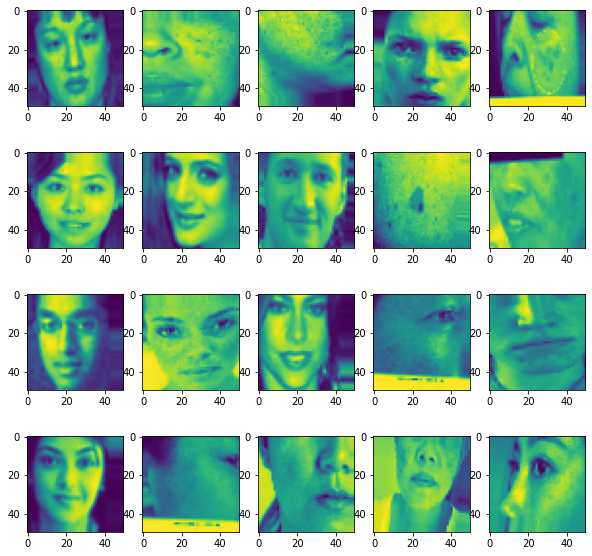

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.imshow(images[i].reshape(50,50))
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
target_train=to_categorical(target_train)
target_train.shape

(488, 2)

In [ ]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential


In [ ]:
model=Sequential()
model.add(Conv2D(100,(3,3),activation="relu",input_shape=(50,50,1)))
model.add(Conv2D(200,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(100,(3,3),activation="relu"))
model.add(Conv2D(100,(3,3),activation="relu"))
model.add(Conv2D(100,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))

In [ ]:
from keras.optimizers import Adam

In [ ]:
model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(dataGen.flow(features_train,target_train,batch_size=20),epochs=20)

Epoch 1/20
25/25 [==============================] - 11s 375ms/step - loss: 0.7188 - accuracy: 0.5163
Epoch 2/20
25/25 [==============================] - 10s 393ms/step - loss: 0.6930 - accuracy: 0.5047
Epoch 3/20
25/25 [==============================] - 10s 379ms/step - loss: 0.6742 - accuracy: 0.5727
Epoch 4/20
25/25 [==============================] - 10s 402ms/step - loss: 0.5138 - accuracy: 0.7606
Epoch 5/20
25/25 [==============================] - 11s 424ms/step - loss: 0.4491 - accuracy: 0.8019
Epoch 6/20
25/25 [==============================] - 10s 395ms/step - loss: 0.3854 - accuracy: 0.8690
Epoch 7/20
25/25 [==============================] - 10s 405ms/step - loss: 0.3132 - accuracy: 0.8795
Epoch 8/20
25/25 [==============================] - 11s 420ms/step - loss: 0.3062 - accuracy: 0.8833
Epoch 9/20
25/25 [==============================] - 10s 406ms/step - loss: 0.2560 - accuracy: 0.9269
Epoch 10/20
25/25 [==============================] - 10s 416ms/step - loss: 0.2428 - accura

In [ ]:
original_image = cv2.imread(r"C:\Users\Logesh\OneDrive\Desktop\New folder2.jpg")

In [ ]:
model_json=model.to_json()
with open(r"train2.json","w") as abc:
    abc.write(model_json)
    abc.close
model.save_weights("train2.h5")


In [ ]:
from keras.models import model_from_json

In [ ]:
json_file=open(r"train.json","r")
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("train.h5")
print("yes")

yes


In [ ]:
def blackSpots():

        image = cv2.imread(r"C:\Users\Logesh\OneDrive\Desktop\New folder1.jpg",1)

        grayimage=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        face_cascade = cv2.CascadeClassifier(r"C:\Users\LOGESH\anaconda3\Library\etc\haarcascades\haarcascade_frontalface_default.xml")
        detected_faces = face_cascade.detectMultiScale(grayimage)

        params = cv2.SimpleBlobDetector_Params()

        params.minThreshold = 0
        params.maxThreshold = 4000

        params.filterByArea = True
        params.minArea = 12
        params.maxArea = 1000

        params.filterByColor = True #Set true for cast_iron as we'll be detecting black regions
        params.blobColor = 0

        params.filterByCircularity = True
        params.minCircularity = 0.5
        params.maxCircularity = 1

        params.filterByConvexity = True
        params.minConvexity = 0.7
        params.maxConvexity =1

        params.filterByInertia = True
        params.minInertiaRatio = 0
        params.maxInertiaRatio = 1

        params.minDistBetweenBlobs = 0

        detector = cv2.SimpleBlobDetector_create(params)

        keypoints = detector.detect(original_image)


        print("Number of blobs detected are : ", len(keypoints))

        img_with_blobs = cv2.drawKeypoints(grayimage, keypoints, np.array([]), (0,0,255),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)                
        plt.imshow(img_with_blobs)
        cv2.imshow("Keypoints", img_with_blobs)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        cv2.imwrite("particle_blobs.jpg", img_with_blobs)

In [ ]:

face_cascade = cv2.CascadeClassifier(r"C:\Users\LOGESH\anaconda3\Library\etc\haarcascades\haarcascade_frontalface_alt2.xml")
from sklearn.model_selection import train_test_split
train, valid = train_test_split(original_image, test_size=0.2, random_state=1)

Number of blobs detected are :  12


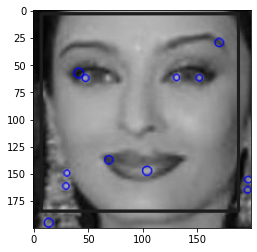

In [ ]:
pipeline1_1=Pipeline([('blackspot',blackSpots())])